In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from sklearn.metrics import f1_score as f1
import plotly.express as ex

In [2]:
df = pd.read_csv("../data/data.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,PaymentMethod,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3
0,CUST0001,Male,20,5,62.31,2950.41,Credit Card,Yes,59,20,63
1,CUST0002,Female,25,23,118.96,7460.55,Bank Transfer,No,42,41,136
2,CUST0003,Female,25,39,69.20,3064.73,Bank Transfer,No,65,0,165
3,CUST0004,Male,56,47,145.90,2612.22,Cash,No,64,40,169
4,CUST0005,Female,33,69,88.51,4833.99,Cash,No,62,1,54


In [4]:

for col in df.columns:
    print(f'Feature: {col}')
    print(f'Min: {df[col].min()}')
    print(f'Max: {df[col].max()}')
    print('---')

Feature: CustomerID
Min: CUST0001
Max: CUST0200
---
Feature: Gender
Min: Female
Max: Male
---
Feature: Age
Min: 18
Max: 69
---
Feature: Tenure
Min: 1
Max: 70
---
Feature: MonthlyCharges
Min: 20.16
Max: 149.44
---
Feature: TotalCharges
Min: 118.08
Max: 9984.36
---
Feature: PaymentMethod
Min: Bank Transfer
Max: PayPal
---
Feature: Churn
Min: No
Max: Yes
---
Feature: ServiceUsage1
Min: 0
Max: 99
---
Feature: ServiceUsage2
Min: 0
Max: 49
---
Feature: ServiceUsage3
Min: 2
Max: 198
---


# EDA

In [5]:
print("Categories in 'PaymentMethod' variable:     ",end=" " )
print(df['PaymentMethod'].unique())

Categories in 'PaymentMethod' variable:      ['Credit Card' 'Bank Transfer' 'Cash' 'PayPal']


C:\Users\kevin\AppData\Local\Temp\ipykernel_20076\61380665.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')


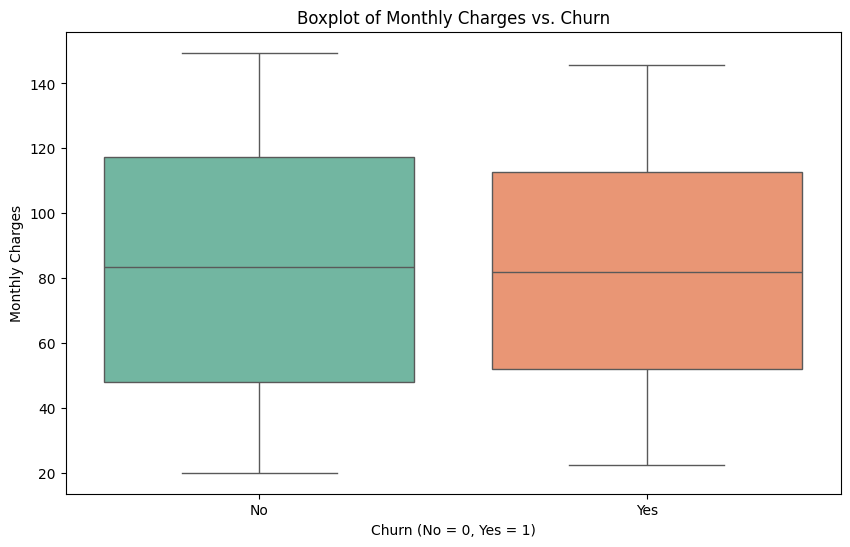

In [6]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')

plt.xlabel('Churn (No = 0, Yes = 1)')
plt.ylabel('Monthly Charges')
plt.title('Boxplot of Monthly Charges vs. Churn')
plt.xticks([0, 1], ['No', 'Yes'])  # Optional: Change the labels to Yes/No
plt.show()

C:\Users\kevin\AppData\Local\Temp\ipykernel_20076\4126077347.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')


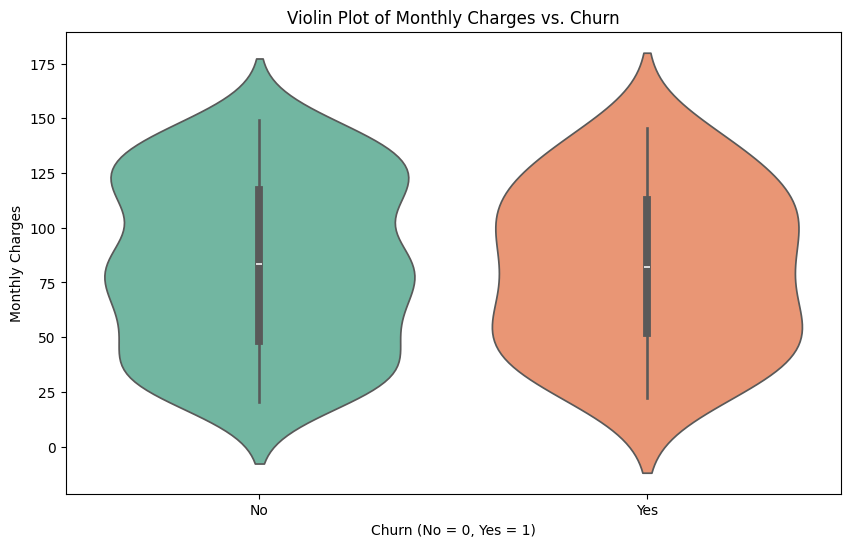

In [7]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')

# Set plot labels and title
plt.xlabel('Churn (No = 0, Yes = 1)')
plt.ylabel('Monthly Charges')
plt.title('Violin Plot of Monthly Charges vs. Churn')
plt.xticks([0, 1], ['No', 'Yes'])  # Optional: Change the labels to Yes/No
plt.show()

### Insights
 Churned customers have a more compressed distribution in spending

In [8]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=df['Age'],name='Age Box Plot',boxmean=True)
tr2=go.Histogram(x=df['Age'],name='Age Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of Customer Ages")
fig.show()

In [9]:
df[df["Tenure"]>65]

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,PaymentMethod,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3
4,CUST0005,Female,33,69,88.51,4833.99,Cash,0,62,1,54
30,CUST0031,Female,26,70,46.25,5484.45,Credit Card,0,74,37,198
33,CUST0034,Female,37,67,46.16,9413.94,Credit Card,0,43,14,57
43,CUST0044,Male,32,66,57.92,1912.24,Bank Transfer,0,29,4,110
52,CUST0053,Female,35,66,28.67,9818.60,Bank Transfer,0,8,1,157
53,CUST0054,Female,50,68,49.01,3163.50,PayPal,0,46,13,171
100,CUST0101,Male,47,66,72.80,7218.53,Cash,0,59,44,167
127,CUST0128,Male,58,68,131.82,2934.17,Bank Transfer,0,47,8,65
146,CUST0147,Male,21,66,53.20,1502.99,Credit Card,0,87,49,177
148,CUST0149,Female,40,69,141.26,7051.56,Credit Card,0,18,29,180


In [10]:
df_yes = df[df["Churn"] == 1]
df_no = df[df["Churn"] == 0]
len(df_yes)

42

In [11]:
df_yes[df_yes["Tenure"]>65]


,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,PaymentMethod,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3
157,CUST0158,Female,54,70,145.63,7950.11,Bank Transfer,1,32,16,86


In [12]:
ex.pie(df_yes,names='PaymentMethod',title='Propotion Of Payment Methods',hole=0.33)

### Insights
Chance of bank transfer to be a churn is low

In [13]:
ex.pie(df_yes,names='Gender',title='Propotion Of Gender',hole=0.33)

In [14]:
ex.pie(df_no,names='Gender',title='Propotion Of Gender',hole=0.33)

# Feature Engineering

In [15]:
null_counts = df.isnull().sum()
print(null_counts)

CustomerID        0
Gender            0
Age               0
Tenure            0
MonthlyCharges    0
TotalCharges      0
PaymentMethod     0
Churn             0
ServiceUsage1     0
ServiceUsage2     0
ServiceUsage3     0
dtype: int64


In [16]:
df.drop("CustomerID",inplace = True,axis = 1)

In [17]:
df.describe()

,Age,Tenure,MonthlyCharges,TotalCharges,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3
count,200.00000,200.000000,200.00000,200.000000,200.00000,200.000000,200.000000,200.000000
mean,42.41000,35.945000,82.97515,5040.986650,0.21000,50.300000,24.695000,107.100000
std,15.12899,20.311939,37.92233,2802.423841,0.40833,28.710476,14.474791,58.037416
min,18.00000,1.000000,20.16000,118.080000,0.00000,0.000000,0.000000,2.000000
25%,29.00000,20.750000,48.72750,2454.822500,0.00000,25.000000,13.000000,54.750000
50%,42.00000,37.500000,83.59500,4931.905000,0.00000,51.500000,25.000000,106.500000
75%,55.00000,53.000000,115.75500,7618.195000,0.00000,76.000000,37.000000,159.250000
max,69.00000,70.000000,149.44000,9984.360000,1.00000,99.000000,49.000000,198.000000


In [18]:
len(df)

200

In [19]:
df.count()

Gender            200
Age               200
Tenure            200
MonthlyCharges    200
TotalCharges      200
PaymentMethod     200
Churn             200
ServiceUsage1     200
ServiceUsage2     200
ServiceUsage3     200
dtype: int64

In [20]:
len(df[df['Churn']=="Yes"])

0

In [21]:
len(df[df['Churn']=="No"])


0

In [22]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [23]:
df['NumberOfMonths'] = df['TotalCharges'] / df['MonthlyCharges']

df['NumberOfMonths'] = df['NumberOfMonths'].fillna(0)
df['NumberOfMonths'] = df['NumberOfMonths'].replace([float('inf'), -float('inf')], 0)
df['TotalServiceUsage'] = df['ServiceUsage1'] + df['ServiceUsage2'] + df['ServiceUsage3']
df['AvgServiceUsage'] = df[['ServiceUsage1', 'ServiceUsage2', 'ServiceUsage3']].mean(axis=1)
df.drop('ServiceUsage1', axis=1, inplace=True)
df.drop('ServiceUsage2', axis=1, inplace=True)
df.drop('ServiceUsage3', axis=1, inplace=True)

In [24]:
df.drop('TotalCharges', axis=1, inplace=True)
df.drop('MonthlyCharges', axis=1, inplace=True)


In [25]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [26]:
df = pd.get_dummies(df, drop_first=True)

In [27]:
X = pd.get_dummies(X, drop_first=True)

In [28]:
y = pd.get_dummies(y, drop_first=True)


                             Gender       Age    Tenure     Churn  \
Gender                     1.000000  0.045676  0.074219  0.177552   
Age                        0.045676  1.000000 -0.028069 -0.006686   
Tenure                     0.074219 -0.028069  1.000000 -0.077970   
Churn                      0.177552 -0.006686 -0.077970  1.000000   
NumberOfMonths            -0.018321 -0.162393 -0.056778  0.017679   
TotalServiceUsage          0.038949  0.046673  0.075909 -0.014202   
AvgServiceUsage            0.038949  0.046673  0.075909 -0.014202   
PaymentMethod_Cash         0.001139  0.055867 -0.118970 -0.009401   
PaymentMethod_Credit Card  0.112989 -0.070489  0.062371  0.142170   
PaymentMethod_PayPal      -0.047113 -0.013495  0.013145  0.061668   

                           NumberOfMonths  TotalServiceUsage  AvgServiceUsage  \
Gender                          -0.018321           0.038949         0.038949   
Age                             -0.162393           0.046673         0.046673 

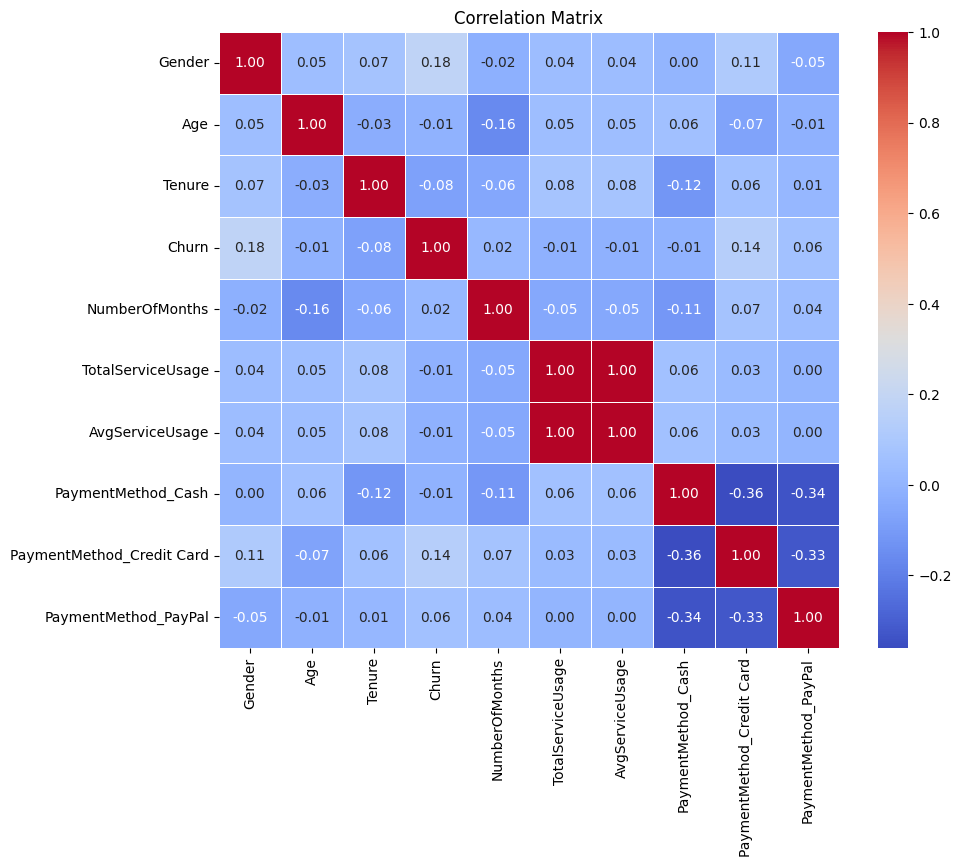

In [29]:
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))  # Set figure size (optional)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [30]:
X.head()

,Gender,Age,Tenure,NumberOfMonths,TotalServiceUsage,AvgServiceUsage,PaymentMethod_Cash,PaymentMethod_Credit Card,PaymentMethod_PayPal
0,1,20,5,47.350506,142,47.333333,False,True,False
1,0,25,23,62.714778,219,73.000000,False,False,False
2,0,25,39,44.288006,230,76.666667,False,False,False
3,1,56,47,17.904181,273,91.000000,True,False,False
4,0,33,69,54.615185,117,39.000000,True,False,False


In [31]:
y.head()

,1
0,True
1,False
2,False
3,False
4,False


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.14, random_state=42, stratify=y)

In [33]:
y.head()

,1
0,True
1,False
2,False
3,False
4,False


In [34]:
y_train.value_counts()

1    
False    135
True      36
Name: count, dtype: int64

## Clearly there is an imbalance in there Churn Class

In [35]:
train_zeros = (y_train.value_counts()[0] / len(y_train)) * 100
test_zeros = (y_test.value_counts()[0] / len(y_test)) * 100

print(f"Percentage of Churn == 0 in X_train: {train_zeros:.2f}%")
print(f"Percentage of Churn == 0 in X_test: {test_zeros:.2f}%")

Percentage of Churn == 0 in X_train: 78.95%
Percentage of Churn == 0 in X_test: 79.31%


In [36]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [37]:
print("After SMOTE:", Counter(y_train))

After SMOTE: Counter({1: 1})


In [38]:
y_train.value_counts()

1    
False    135
True     135
Name: count, dtype: int64

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Model Selection

In [40]:
def train_and_evaluate_model(model, model_name):
    # Fit the model
    model.fit(X_train, y_train)
    print("FOR TRAIN DATA")

    y_pred = model.predict(X_train)

    # Calculate metrics
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)

    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\n")

    print("FOR TEST DATA")
    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\n")

    return accuracy, precision, recall, f1, y_pred

In [41]:
# y_train = y_train.values.ravel()
# y_test = y_test.values.ravel()

In [42]:
log_reg = LogisticRegression(random_state=42, max_iter=100, class_weight="balanced")
log_reg_results = train_and_evaluate_model(log_reg, "Logistic Regression")


FOR TRAIN DATA
Logistic Regression Performance:
Accuracy: 0.8037
Precision: 0.8596
Recall: 0.7259
F1-Score: 0.7871


FOR TEST DATA
Logistic Regression Performance:
Accuracy: 0.7586
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000




c:\Users\kevin\anaconda3\envs\AOD\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\kevin\anaconda3\envs\AOD\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [43]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree_results = train_and_evaluate_model(decision_tree, "Decision Tree")

FOR TRAIN DATA
Decision Tree Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


FOR TEST DATA
Decision Tree Performance:
Accuracy: 0.6552
Precision: 0.2500
Recall: 0.3333
F1-Score: 0.2857




In [44]:
random_forest = RandomForestClassifier(random_state=42)
random_forest_results = train_and_evaluate_model(random_forest, "Random Forest")

C:\Users\kevin\AppData\Local\Temp\ipykernel_20076\1518599839.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



FOR TRAIN DATA
Random Forest Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


FOR TEST DATA
Random Forest Performance:
Accuracy: 0.8276
Precision: 0.6000
Recall: 0.5000
F1-Score: 0.5455




In [45]:
from sklearn.pipeline import Pipeline

In [46]:
y_train = y_train.values.ravel() if hasattr(y_train, "values") else y_train.ravel()

In [47]:
rf_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",RandomForestClassifier(random_state=42)) ])
decision_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",DecisionTreeClassifier(random_state=42)) ])
log_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",LogisticRegression(random_state=42, max_iter=100, class_weight="balanced")) ])


f1_cross_val_scores = cross_val_score(rf_pipe,X_train,y_train,cv=5,scoring='f1')
dec_f1_cross_val_scores=cross_val_score(decision_pipe,X_train,y_train,cv=5,scoring='f1')
log_f1_cross_val_scores=cross_val_score(log_pipe,X_train,y_train,cv=5,scoring='f1')

In [48]:
fig = make_subplots(rows=3, cols=1,shared_xaxes=True,subplot_titles=('Random Forest Cross Val Scores',
                                                                     'Decision Tree Cross Val Scores',
                                                                    'Logistic Cross Val Scores'))

fig.add_trace(
    go.Scatter(x=list(range(0,len(f1_cross_val_scores))),y=f1_cross_val_scores,name='Random Forest'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=list(range(0,len(dec_f1_cross_val_scores))),y=dec_f1_cross_val_scores,name='Decision Tree'),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=list(range(0,len(log_f1_cross_val_scores))),y=log_f1_cross_val_scores,name='SVM'),
    row=3, col=1
)

fig.update_layout(height=700, width=900, title_text="Different Model 5 Fold Cross Validation")
fig.update_yaxes(title_text="F1 Score")
fig.update_xaxes(title_text="Fold #")

fig.show()

In [49]:
rf_pipe.fit(X_train,y_train)
rf_prediction = rf_pipe.predict(X_test)

decision_pipe.fit(X_train,y_train)
dec_prediction = decision_pipe.predict(X_test)

log_pipe.fit(X_train,y_train)
log_prediction = log_pipe.predict(X_test)

In [50]:
rf_metrics = {
    "Accuracy": accuracy_score(y_test, rf_prediction),
    "Precision": precision_score(y_test, rf_prediction, zero_division=0),
    "Recall": recall_score(y_test, rf_prediction),
    "F1-Score": f1_score(y_test, rf_prediction)
}

dec_metrics = {
    "Accuracy": accuracy_score(y_test, dec_prediction),
    "Precision": precision_score(y_test, dec_prediction, zero_division=0),
    "Recall": recall_score(y_test, dec_prediction),
    "F1-Score": f1_score(y_test, dec_prediction)
}

log_metrics = {
    "Accuracy": accuracy_score(y_test, log_prediction),
    "Precision": precision_score(y_test, log_prediction, zero_division=0),
    "Recall": recall_score(y_test, log_prediction),
    "F1-Score": f1_score(y_test, log_prediction)
}


In [51]:
models = ['<b>Random Forest<b>', '<b>Decision Tree<b>', '<b>Logistic Regression<b>']
accuracy = [np.round(rf_metrics['Accuracy'], 2), np.round(dec_metrics['Accuracy'], 2), np.round(log_metrics['Accuracy'], 2)]
precision = [np.round(rf_metrics['Precision'], 2), np.round(dec_metrics['Precision'], 2), np.round(log_metrics['Precision'], 2)]
recall = [np.round(rf_metrics['Recall'], 2), np.round(dec_metrics['Recall'], 2), np.round(log_metrics['Recall'], 2)]
f1_scores = [np.round(rf_metrics['F1-Score'], 2), np.round(dec_metrics['F1-Score'], 2), np.round(log_metrics['F1-Score'], 2)]

In [52]:
fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>Model<b>', '<b>Accuracy<b>', '<b>Precision<b>', '<b>Recall<b>', '<b>F1-Score<b>'],
                line_color='darkslategray',
                fill_color='whitesmoke',
                align=['center', 'center'],
                font=dict(color='black', size=18),
                height=40),
    cells=dict(values=[models, accuracy, precision, recall, f1_scores],
               line_color='darkslategray',
               fill_color='lightgrey',
               align=['center', 'center'],
               font=dict(color='darkslategray', size=16),
               height=30))
])

# Update layout and display the table
fig.update_layout(title_text='<b>Model Performance Metrics</b>', title_x=0.5, title_font_size=22)
fig.show()

# Hyperparameter Tuning

In [53]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [54]:
rf_p_dist = {
    'RF__n_estimators': np.arange(10, 200, 10),
    'RF__max_depth': [None, 10, 20, 30],
    'RF__min_samples_split': [2, 5, 10],
    'RF__min_samples_leaf': [1, 2, 4],
    'RF__bootstrap': [True, False]
}


In [55]:
est = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_p_dist = {
    'max_depth': [3, 5, 10, None],
    'n_estimators': [10, 100, 300, 500],
    'max_features': [1, 5, 8,13,20],  # Replace randint with explicit values
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'min_samples_leaf': [1, 4, 7,10,15]  # Replace randint with explicit values
}

In [56]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

In [57]:
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [58]:
# rf_random_search = RandomizedSearchCV(est, param_distributions=rf_p_dist, n_iter=100, cv=5, scoring='f1', random_state=42, n_jobs=-1)
# rf_random_search.fit(X_train, y_train)
# print("Best Parameters for Random Forest:", rf_random_search.best_params_)
# print("Best score is", rf_random_search.best_score_)


In [59]:
rf_best_model = Pipeline(steps=[
    ('scale', StandardScaler()),
    ("RF", RandomForestClassifier(bootstrap=False, max_depth=10, max_features=1,
                       n_estimators=200, random_state=42))
])

In [60]:
rf_best_model.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('RF',
                 RandomForestClassifier(bootstrap=False, max_depth=10,
                                        max_features=1, n_estimators=200,
                                        random_state=42))])

In [61]:
rf_f1_test_score = f1_score(y_test, rf_best_model.predict(X_test))
print("F1 Score on Test Set:", rf_f1_test_score)

F1 Score on Test Set: 0.5


In [62]:
rf_f1_cross_val_scores = cross_val_score(rf_best_model, X_train, y_train, cv=5, scoring='accuracy')

In [63]:
X_train.head()

,Gender,Age,Tenure,NumberOfMonths,TotalServiceUsage,AvgServiceUsage,PaymentMethod_Cash,PaymentMethod_Credit Card,PaymentMethod_PayPal
0,1,42,43,44.560404,82,27.333333,True,False,False
1,1,59,64,107.341489,239,79.666667,False,True,False
2,1,29,48,18.805855,210,70.000000,True,False,False
3,0,48,14,81.681110,50,16.666667,False,False,False
4,1,50,40,2.521064,156,52.000000,True,False,False


In [64]:
rf_prediction = rf_best_model.predict(X_test)

In [65]:
rf_metrics = {
    "Accuracy": accuracy_score(y_test, rf_prediction),
    "Precision": precision_score(y_test, rf_prediction, zero_division=0),
    "Recall": recall_score(y_test, rf_prediction),
    "F1-Score": f1_score(y_test, rf_prediction)
}

In [66]:
print(rf_metrics)

{'Accuracy': 0.7931034482758621, 'Precision': 0.5, 'Recall': 0.5, 'F1-Score': 0.5}


In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
rf = RandomForestClassifier(random_state=42)

In [69]:
# grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=rf_p_dist,  # Prefix 'rf__' for pipeline params
#     cv=5,
#     scoring='f1',
#     n_jobs=-1,
#     verbose=1
# )

# grid_search.fit(X_train, y_train)

In [70]:
# !pip install scikit-learn==1.1.3


In [71]:
# import joblib

# joblib.dump(rf_best_model, './model.pkl')

In [72]:
import sklearn

In [73]:
print(sklearn.__version__)

1.1.3


In [74]:
rf_best_model = RandomForestClassifier(bootstrap=False, max_depth=10, max_features=1,
                       n_estimators=200, random_state=42)

In [75]:
scaler = StandardScaler()

In [76]:
X_train.head()

,Gender,Age,Tenure,NumberOfMonths,TotalServiceUsage,AvgServiceUsage,PaymentMethod_Cash,PaymentMethod_Credit Card,PaymentMethod_PayPal
0,1,42,43,44.560404,82,27.333333,True,False,False
1,1,59,64,107.341489,239,79.666667,False,True,False
2,1,29,48,18.805855,210,70.000000,True,False,False
3,0,48,14,81.681110,50,16.666667,False,False,False
4,1,50,40,2.521064,156,52.000000,True,False,False


In [77]:
rf_best_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, max_features=1,
                       n_estimators=200, random_state=42)

In [78]:
y_pred = rf_best_model.predict(X_test)

In [79]:
cm = confusion_matrix(y_test, y_pred)

In [80]:
from sklearn.metrics import  ConfusionMatrixDisplay

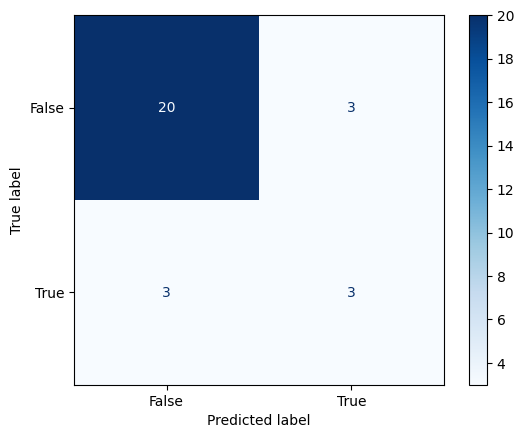

In [81]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Insights
The confusion matrix indicates balanced but imperfect prediction accuracy

In [82]:
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [83]:
# joblib.dump(scaler, './scaler.pkl')

# Checking Feature Importance

In [84]:
rf_best_model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=False, max_depth=10, max_features=1,
                       n_estimators=200, random_state=42)

In [85]:
importances = rf_best_model.feature_importances_

feature_names = X_train.columns

indices = importances.argsort()

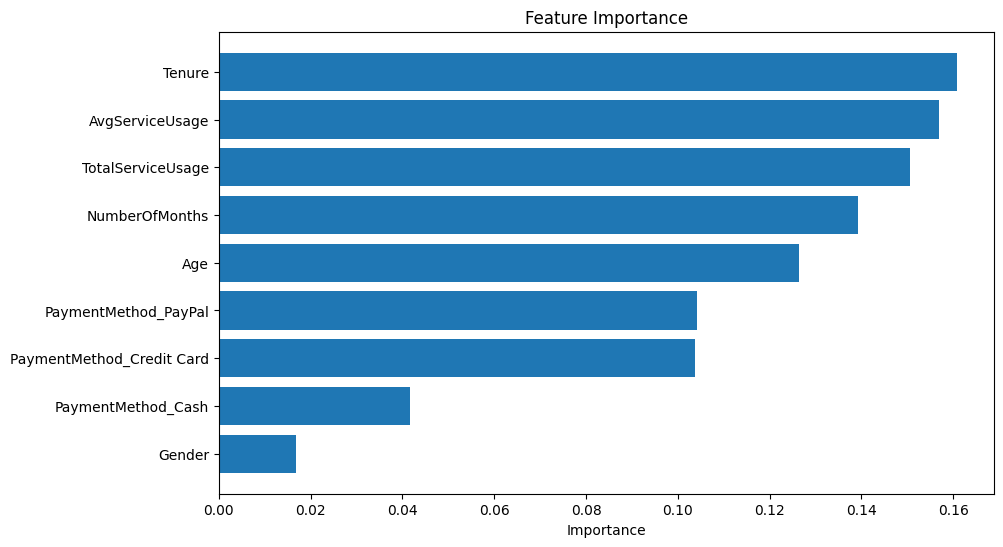

In [86]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.show()

In [88]:
import shap
shap.initjs()


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [89]:
explainer = shap.Explainer(rf_best_model)

# Compute SHAP values for the training set (or a sample)
shap_values = explainer(X_train)


In [90]:
type(shap_values)

shap._explanation.Explanation

In [91]:
# shap_values.values = shap_values.values[:,:,0]

In [92]:
print(np.shape(shap_values.values))  # SHAP values for class 0 (no churn)
print(X_train.shape)

(270, 9, 2)
(270, 9)


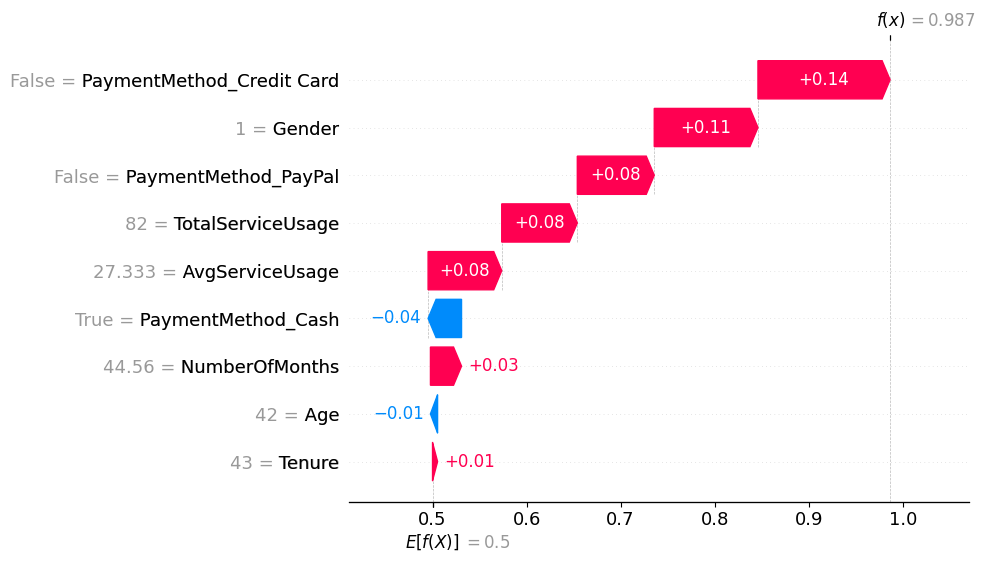

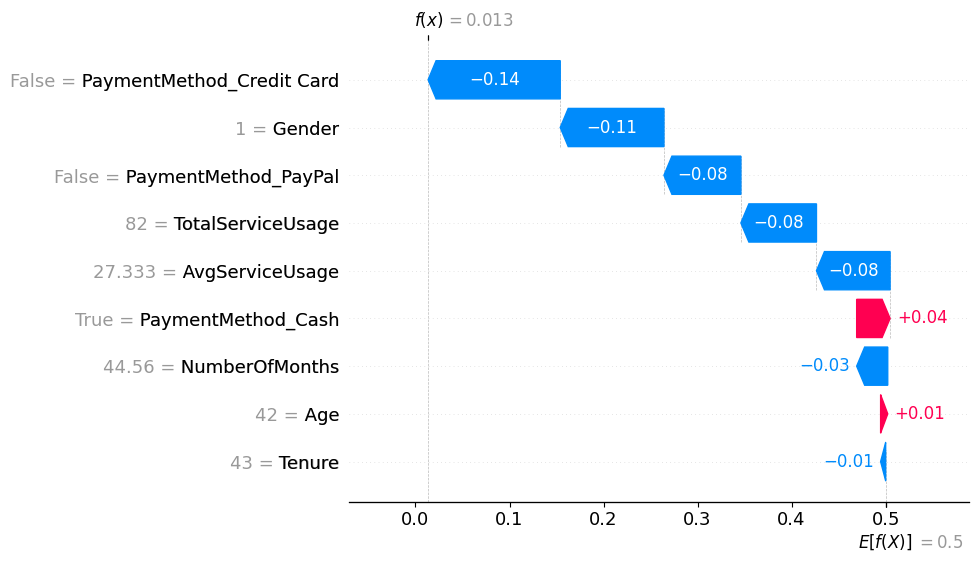

In [93]:
shap.plots.waterfall(shap_values[0,:,0])
shap.plots.waterfall(shap_values[0,:,1])


### Insights
Minimal impact factors include age and tenure

Strong negative contributors reducing likelihood of churn
- Not having a credit card:
- Gender
- Not using PayPal
- Total Service Usage

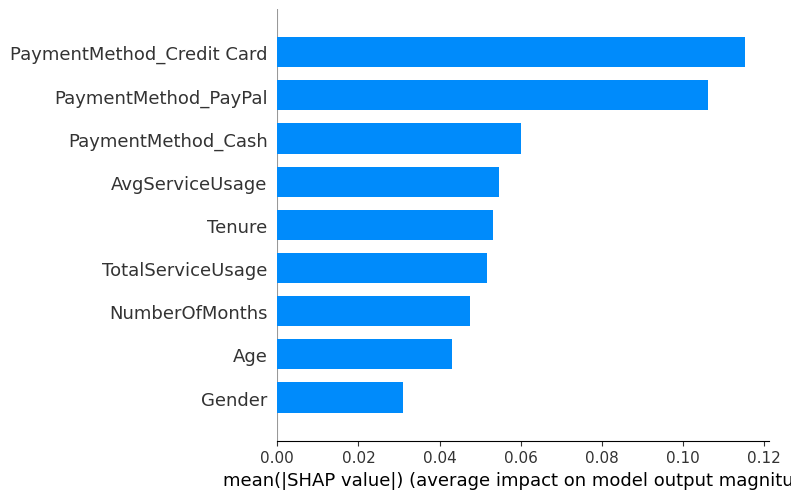

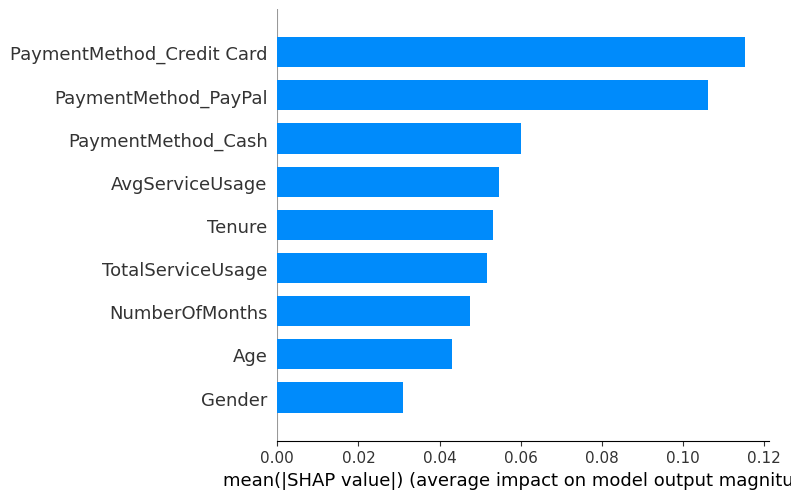

In [94]:
# Plotting SHAP values for class 1
shap.summary_plot(shap_values[:, :, 1], X_train, plot_type="bar")
shap.summary_plot(shap_values[:, :, 0], X_train, plot_type="bar")


# Final Thoughts
**From this pattern we cans say that customer behavior and payment preferences are more useful than personal characteristics while predicting churn probabilty because shap values account for feature interactions.**